# Exploratory Data Analysis (EDA) for NLP Breast Cancer Dataset

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

## Part 0: Read in and clean up dataset

### Raw data (not validated by authors)

In [ ]:
raw_data = pd.read_excel('drive/MyDrive/June/Supplementary1_V2.xlsx')
# Overview of columns in dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12565 entries, 0 to 12564
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DB.ID       12565 non-null  object 
 1   DISEASE     12562 non-null  object 
 2   DIS_CLAS    12565 non-null  object 
 3   GENE        12532 non-null  object 
 4   PUBMEDID    12565 non-null  int64  
 5   LACKASSO1   12565 non-null  object 
 6   TITLE       4157 non-null   object 
 7   MYYEAR      12375 non-null  float64
 8   CONCLUSION  11258 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 883.6+ KB


### Validated data (the main dataset we will use)

In [ ]:
data = pd.read_excel('drive/MyDrive/June/Supplementary2_V2.xlsx')
# Overview of columns in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11453 entries, 0 to 11452
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DB_ID              11453 non-null  object 
 1   DISEASE            11450 non-null  object 
 2   DIS_CLASS          11453 non-null  object 
 3   GENE               11453 non-null  object 
 4   PUBMED.ID          11453 non-null  int64  
 5   LACKASSO           11453 non-null  object 
 6   TITLE              4078 non-null   object 
 7   YEAR               11453 non-null  int64  
 8   CONCLUSION         9050 non-null   object 
 9   REF_SENTENCE       11453 non-null  object 
 10  ASSOCIATION_CLASS  11453 non-null  object 
 11  REF_GENE           11453 non-null  object 
 12  GENE_NEW           11453 non-null  object 
 13  WEIGHT             11453 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.2+ MB


In [ ]:
# First 5 rows in dataset
data.head()

,DB_ID,DISEASE,DIS_CLASS,GENE,PUBMED.ID,LACKASSO,TITLE,YEAR,CONCLUSION,REF_SENTENCE,ASSOCIATION_CLASS,REF_GENE,GENE_NEW,WEIGHT
0,bc_id1,breast cancer,CANCER,MYCL1,1345822,Y,Association between restriction fragment lengt...,1992,NaN,No differences in the patterns of L-myc RFLP w...,N,L-myc,MYCL,1.000000
1,bc_id10,breast cancer,CANCER,CYP1A1,8000303,B,Genetics of CYP1A1: coamplification of specifi...,1994,NaN,CYP1A1 is a gene of the cytochrome P-450 famil...,A,CYP1A1,CYP1A1,0.421875
2,bc_id100,breast carcinomas,CANCER,CDH1,11322170,B,Disparate E-cadherin mutations in LCIS and ass...,2001,These data support the hypothesis that LCIS is...,"However, mutational analysis of E-cadherin in ...",A,E-cadherin,CDH1,0.428571
3,bc_id1000,breast cancer,CANCER,AHR,16103451,B,Estrogen metabolism-related genes and breast c...,2005,NaN,The findings provide no evidence for a role of...,N,AHR,AHR,0.400000
4,bc_id1001,breast cancer,CANCER,SULT1A1,16103451,B,Estrogen metabolism-related genes and breast c...,2005,NaN,The findings provide no evidence for a role of...,N,SULT1A1,SULT1A1,0.275000


In [ ]:
# First reference sentence
data['REF_SENTENCE'].values[0]

'No differences in the patterns of L-myc RFLP were found between breast cancer patients and healthy individuals.'

In [ ]:
# Different association classes assigned by authors
set(data['ASSOCIATION_CLASS'])

{'A', 'ANF', 'MC', 'N', 'NR', 'PNF', 'X', 'Y'}

### Remove rows with uninformative (i.e. too short) sentences

In [ ]:
uninformative_sentences = data[(data['REF_SENTENCE'].str.len() < 5)]['REF_SENTENCE']
uninformative_sentences.value_counts()

X      1267
NR       80
ANF      45
MC        8
PNF       1
Name: REF_SENTENCE, dtype: int64

In [ ]:
# @title
data[data['REF_SENTENCE'].isin(uninformative_sentences)]['REF_GENE'].value_counts()

X            1245
NR             80
ANF            45
MC              8
CYP2D6          1
PRL             1
NBS1            1
XPD             1
CCND1           1
BRCA1           1
BRCA2           1
CYP2B6          1
CYP2C19         1
CYP2C9          1
GATA3           1
CYP3A5          1
MMP-1           1
MMP-12          1
MMP-13          1
MMP-3           1
MMP-7           1
MMP-9           1
XRCC5Ku80       1
XRCC6Ku70       1
RAD51           1
FGFR2           1
PNF             1
Name: REF_GENE, dtype: int64

In [ ]:
data.drop(uninformative_sentences.index, inplace=True)

In [ ]:
# Remaining association classes
data['ASSOCIATION_CLASS'].value_counts()

X     4900
Y     2507
A     1620
N     1018
NR       7
Name: ASSOCIATION_CLASS, dtype: int64

In [ ]:
# Remove sentences with NR association class as they are too few in number to be meaningful
nr_sentences = data[(data['ASSOCIATION_CLASS'] == 'NR')]
data.drop(nr_sentences.index, inplace=True)

In [ ]:
data['ASSOCIATION_CLASS'].value_counts()

X    4900
Y    2507
A    1620
N    1018
Name: ASSOCIATION_CLASS, dtype: int64

In [ ]:
len(data)

10045

### Save clean data for later preprocessing

In [ ]:
data.to_csv('drive/MyDrive/June/Supplementary2_V2_clean.xlsx', index=False)

## Part 1: Basic text statistics

### Distributions

#### Reference sentence length (i.e. number of characters)

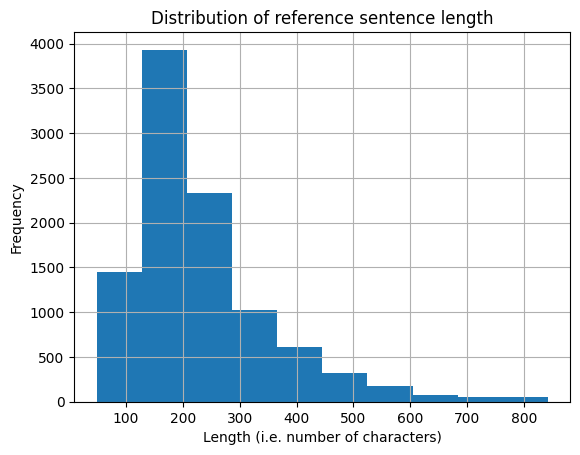

In [ ]:
data['REF_SENTENCE'].str.len().hist()
plt.xlabel('Length (i.e. number of characters)')
plt.ylabel('Frequency')
plt.title('Distribution of reference sentence length')
plt.show()

#### Number of words in each sentence

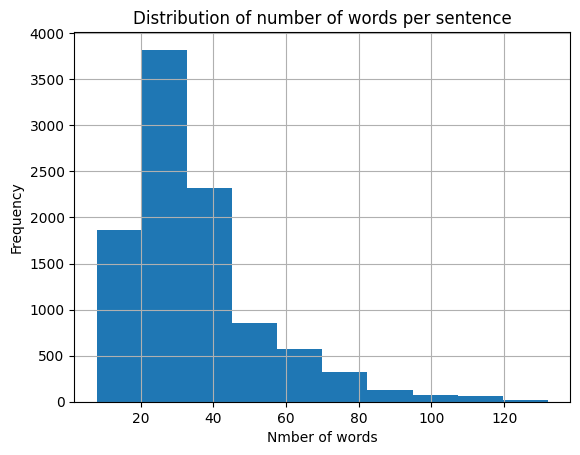

In [ ]:
data['REF_SENTENCE'].str.split().map(lambda x: len(x)).hist()
plt.xlabel('Nmber of words')
plt.ylabel('Frequency')
plt.title('Distribution of number of words per sentence')
plt.show()

#### Average word length in each sentence

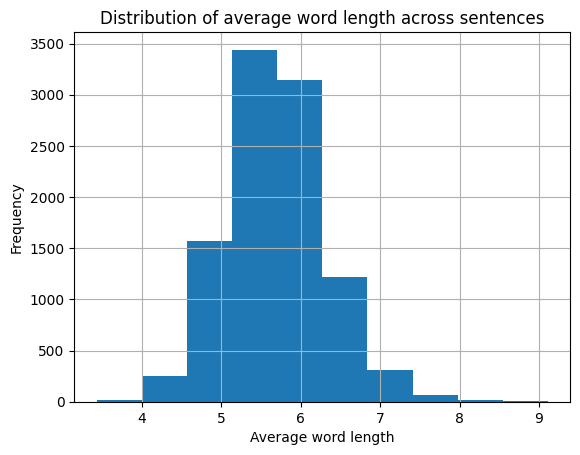

In [ ]:
data['REF_SENTENCE'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.xlabel('Average word length')
plt.ylabel('Frequency')
plt.title('Distribution of average word length across sentences')
plt.show()

### Most common words

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Count words that are not stopwords
corpus=[]
new= data['REF_SENTENCE'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

#### Unigrams

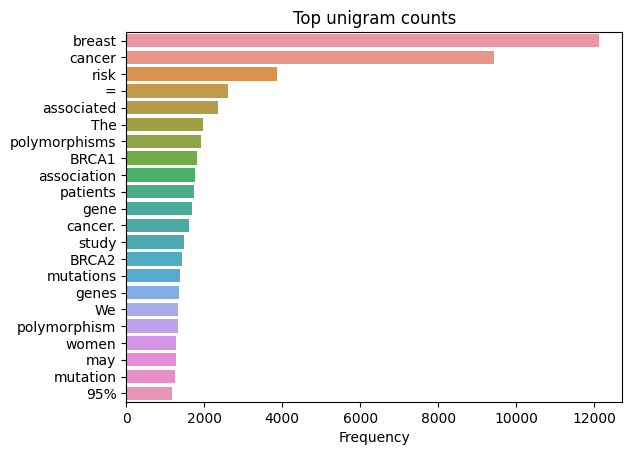

In [ ]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

ax = sns.barplot(x=y,y=x)
ax.set(xlabel='Frequency', title='Top unigram counts')
plt.show()

#### Bigrams

In [ ]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

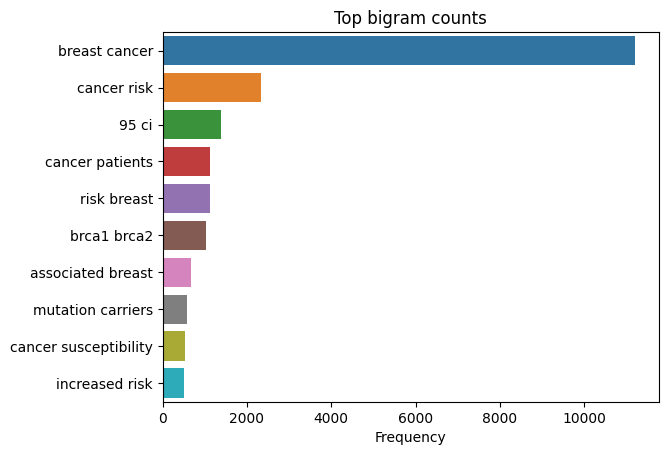

In [ ]:
top_n_bigrams=get_top_ngram(data['REF_SENTENCE'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
ax = sns.barplot(x=y,y=x)
ax.set(xlabel='Frequency', title='Top bigram counts')
plt.show()

#### Trigrams

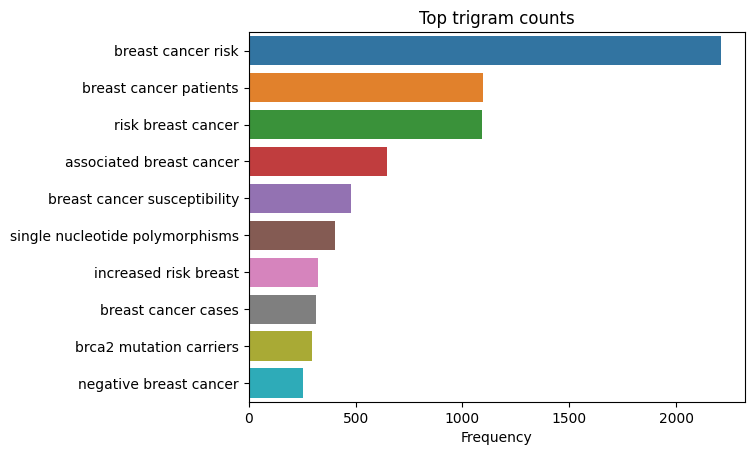

In [ ]:
top_tri_grams=get_top_ngram(data['REF_SENTENCE'],n=3)[:10]
x,y=map(list,zip(*top_tri_grams))
ax = sns.barplot(x=y,y=x)
ax.set(xlabel='Frequency', title='Top trigram counts')
plt.show()

### Word cloud

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

# Tokenize, remove stopwords, and stem
def preprocess(df):
    corpus_wordcloud=''
    wn=WordNetLemmatizer()
    for sentence in df['REF_SENTENCE']:
        words=[w for w in word_tokenize(sentence) if (w not in stop)]

        words=[wn.lemmatize(w) for w in words if len(w)>2]

        corpus_wordcloud += ' '.join(words) + ' '
    return corpus_wordcloud

corpus_wordcloud=preprocess(data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


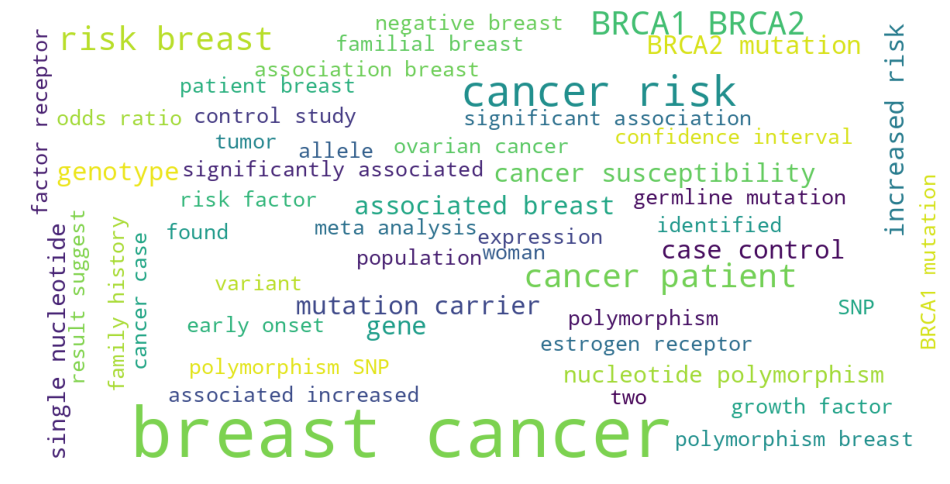

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(data)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus_wordcloud)

### Sentence-gene combinations

In [ ]:
# Number of unique sentences
len(set(data['REF_SENTENCE']))

7288

In [ ]:
# Number of duplicate sentences
len(data[data.duplicated(subset=['REF_SENTENCE'])])

2757

In [ ]:
# Sentences that mention multiple kinds of gene associations
multiple_associations = data.groupby(['REF_SENTENCE'])['ASSOCIATION_CLASS'].nunique().gt(1)
data.loc[data['REF_SENTENCE'].isin(multiple_associations[multiple_associations].index)][['REF_SENTENCE', 'ASSOCIATION_CLASS', 'REF_GENE']].sort_values(by=['REF_SENTENCE'])

,REF_SENTENCE,ASSOCIATION_CLASS,REF_GENE
1042,A case (n=250)-control (n=500) study was under...,Y,p53
1039,A case (n=250)-control (n=500) study was under...,A,GSTT1
1040,A case (n=250)-control (n=500) study was under...,A,GSTP1
1041,A case (n=250)-control (n=500) study was under...,A,GSTM1
1044,A case (n=250)-control (n=500) study was under...,Y,TGFbeta1
...,...,...,...
657,we investigated the association between breast...,N,SHMT1
655,we investigated the association between breast...,Y,MTR
656,we investigated the association between breast...,N,MTRR
654,we investigated the association between breast...,N,CBS


In [ ]:
# Number of unique sentences that mention multiple kinds of gene associations
len(set(data.loc[data['REF_SENTENCE'].isin(multiple_associations[multiple_associations].index)]['REF_SENTENCE']))

181

## Part 2: Hypothesis formulation

Independent variable: REF_SENTENCE + REF_GENE

Dependent variable: ASSOCIATION_CLASS

### Question 1: Gene classification

Which genes are positively/negatively associated with breast cancer? Which ones are ambiguous or can have multiple kinds of association?

In [ ]:
# Count association classes for every gene
gene_class_counts = data.groupby(['REF_GENE'])['ASSOCIATION_CLASS'].value_counts().unstack()
# Get the primary class without the no-info class since it's the most frequent one
primary_class = gene_class_counts.drop('X', axis=1).idxmax(axis=1)

In [ ]:
positive_genes = gene_class_counts[primary_class == 'Y'][['Y']].sort_values(by='Y', ascending=False)
print(len(positive_genes), 'genes with a primary positive class')
positive_genes.head(10)

556 genes with a primary positive class


ASSOCIATION_CLASS,Y
REF_GENE,
BRCA1,175.0
BRCA2,131.0
MTHFR,56.0
PALB2,48.0
FGFR2,47.0
TP53,47.0
CHEK2,46.0
GSTM1,45.0
GSTT1,40.0


In [ ]:
negative_genes = gene_class_counts[primary_class == 'N'][['N']].sort_values(by='N', ascending=False)
print(len(negative_genes), 'genes with a primary negative class')
negative_genes.head(10)

264 genes with a primary negative class


ASSOCIATION_CLASS,N
REF_GENE,
NAT2,12.0
CYP1A2,6.0
SOD2,6.0
MTRR,5.0
IGF1,5.0
SHBG,5.0
BRIP1,5.0
LEP,5.0
BARD1,5.0


In [ ]:
ambiguous_genes = gene_class_counts[primary_class == 'A'][['A']].sort_values(by='A', ascending=False)
print(len(ambiguous_genes), 'genes with a primary ambiguous class')
ambiguous_genes.head(10)

422 genes with a primary ambiguous class


ASSOCIATION_CLASS,A
REF_GENE,
XRCC1,31.0
BRCA1/2,28.0
COMT,24.0
CYP1A1,23.0
RAD51,22.0
CYP17,20.0
XRCC3,17.0
CYP1B1,17.0
AR,16.0


In [ ]:
noinfo_genes = gene_class_counts[primary_class.isna()][['X']].sort_values(by='X', ascending=False)
print(len(noinfo_genes), 'genes with a primary no-info class')
noinfo_genes.head(10)

426 genes with a primary no-info class


ASSOCIATION_CLASS,X
REF_GENE,
OS,15.0
breast cancer 1,8.0
DARC,6.0
CPM,6.0
phosphatase and tensin homolog,6.0
FHIT,5.0
ILC,5.0
TTP,5.0
LE,5.0


### Question 2: Association explainability

For each kind of association, what are the keywords/phrases in the given text that explain or allude to that specific association?

In [ ]:
# Modified previous function by retaining some potentially useful stopwords
def get_top_ngram_with_some_stopwords(corpus, n=None):
    stopwords_to_keep = set(['any', 'are', 'aren\'t', 'both', 'did', 'didn\'t', 'do', 'does', 'doesn\'t', 'don\'t', 'had', 'hadn\'t', 'has', 'hasn\'t',
                             'have', 'haven\'t', 'is', 'isn\'t', 'no', 'nor', 'not', 'some', 'was', 'wasn\'t', 'were', 'weren\'t'])
    vec = CountVectorizer(ngram_range=(n, n), stop_words=list(stop - stopwords_to_keep)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

In [ ]:
top_n_bigrams_positive=get_top_ngram_with_some_stopwords(data[data['ASSOCIATION_CLASS'] == 'Y']['REF_SENTENCE'],2)
top_n_bigrams_negative=get_top_ngram_with_some_stopwords(data[data['ASSOCIATION_CLASS'] == 'N']['REF_SENTENCE'],2)
x_positive,y_positive=map(list,zip(*top_n_bigrams_positive))
x_negative,y_negative=map(list,zip(*top_n_bigrams_negative))

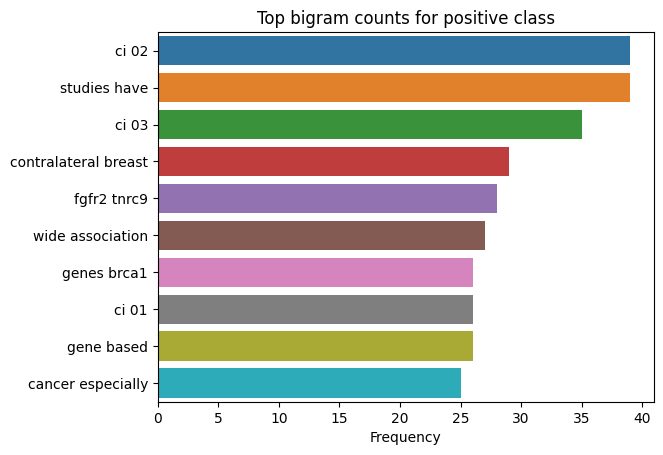

In [ ]:
only_positive_bigrams=list(set(x_positive) - set(x_negative))
only_positive_counts=[y_positive[x_positive.index(bigram)] for bigram in only_positive_bigrams]
positive_bigrams_counts=sorted(zip(only_positive_bigrams, only_positive_counts), key = lambda x: x[1], reverse=True)[:10]
x_only_positive,y_only_positive=map(list,zip(*positive_bigrams_counts))
ax = sns.barplot(x=y_only_positive,y=x_only_positive)
ax.set(xlabel='Frequency', title='Top bigram counts for positive class')
plt.show()

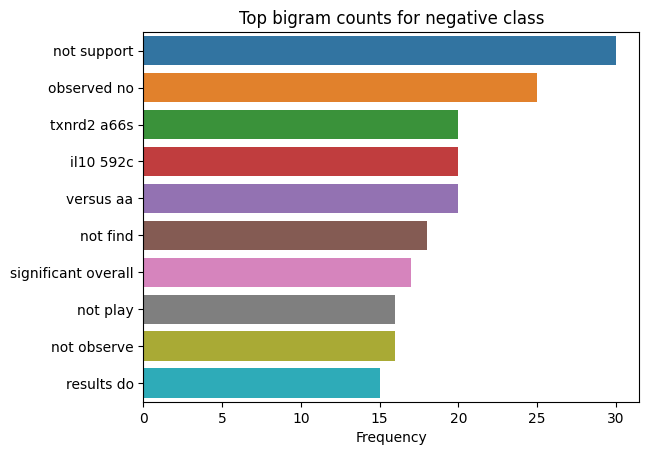

In [ ]:
only_negative_bigrams=list(set(x_negative) - set(x_positive))
only_negative_counts=[y_negative[x_negative.index(bigram)] for bigram in only_negative_bigrams]
negative_bigrams_counts=sorted(zip(only_negative_bigrams, only_negative_counts), key = lambda x: x[1], reverse=True)[:10]
x_only_negative,y_only_negative=map(list,zip(*negative_bigrams_counts))
ax = sns.barplot(x=y_only_negative,y=x_only_negative)
ax.set(xlabel='Frequency', title='Top bigram counts for negative class')
plt.show()

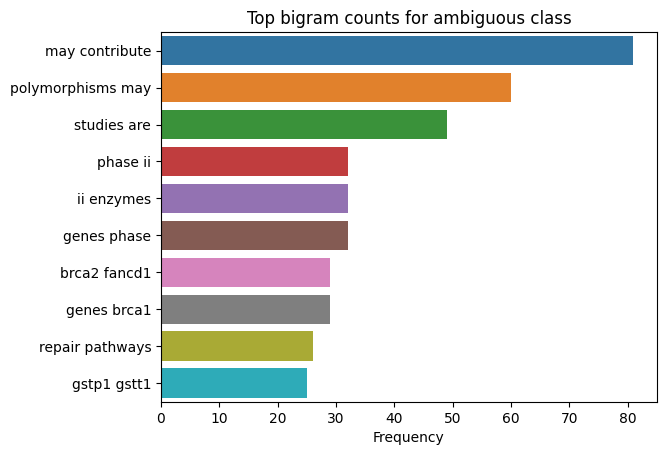

In [ ]:
top_n_bigrams_ambiguous=get_top_ngram_with_some_stopwords(data[data['ASSOCIATION_CLASS'] == 'A']['REF_SENTENCE'],2)
x_ambiguous,y_ambiguous=map(list,zip(*top_n_bigrams_ambiguous))
only_ambiguous_bigrams=list(set(x_ambiguous) - set(x_negative))
only_ambiguous_counts=[y_ambiguous[x_ambiguous.index(bigram)] for bigram in only_ambiguous_bigrams]
ambiguous_bigrams_counts=sorted(zip(only_ambiguous_bigrams, only_ambiguous_counts), key = lambda x: x[1], reverse=True)[:10]
x_only_ambiguous,y_only_ambiguous=map(list,zip(*ambiguous_bigrams_counts))
ax = sns.barplot(x=y_only_ambiguous,y=x_only_ambiguous)
ax.set(xlabel='Frequency', title='Top bigram counts for ambiguous class')
plt.show()

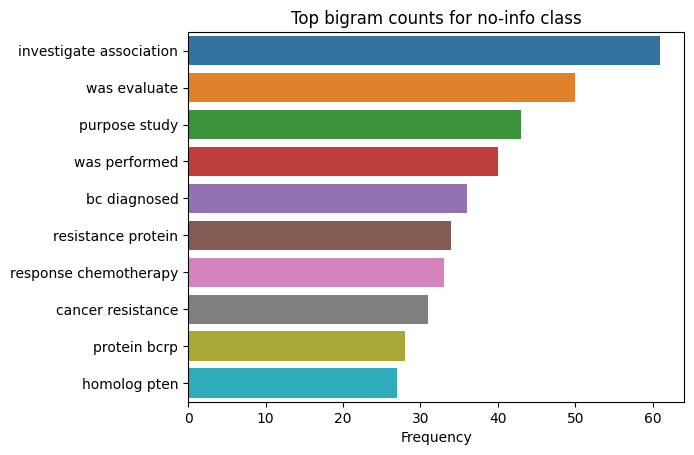

In [ ]:
top_n_bigrams_no_info=get_top_ngram_with_some_stopwords(data[data['ASSOCIATION_CLASS'] == 'X']['REF_SENTENCE'],2)
x_no_info,y_no_info=map(list,zip(*top_n_bigrams_no_info))
only_noinfo_bigrams=list(set(x_no_info) - set(x_positive + x_negative))
only_noinfo_counts=[y_no_info[x_no_info.index(bigram)] for bigram in only_noinfo_bigrams]
noinfo_bigrams_counts=sorted(zip(only_noinfo_bigrams, only_noinfo_counts), key = lambda x: x[1], reverse=True)[:10]
x_only_noinfo,y_only_noinfo=map(list,zip(*noinfo_bigrams_counts))
ax = sns.barplot(x=y_only_noinfo,y=x_only_noinfo)
ax.set(xlabel='Frequency', title='Top bigram counts for no-info class')
plt.show()